In [1]:
import numpy as np

import os.path as osp

from tf_lab.nips.helper import plot_probability_space_on_voxels, pclouds_centered_and_half_sphere

from bench_pc_gan.evaluate_gan import entropy_of_occupancy_grid, jensen_shannon_divergence

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id

from tf_lab.nips.data_sets.shape_net import pc_loader as sn_pc_loader

import tf_lab.point_clouds.in_out as pio

from matplotlib import pyplot as plt

PyTorch not working. MMD measurement won't be available


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
n_pc_samples = 2048
class_name = 'chair'
top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'

# syn_pc_file = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/chair_mlp_arch_raw_gan_2048_pts/epoch_900.npz'
# syn_pc_file = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/mit_3dgan_synthetic_samples/isosurface_extracted/chair.npz'
syn_pc_file = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/nb_ae_emd_chair_2048_pts/epoch_500.npz'

In [4]:
# Load Raw Point-Clouds of class
pclouds_path = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/centered/', str(n_pc_samples))
syn_id = shape_net_category_to_synth_id()[class_name]
pclouds_path = osp.join(pclouds_path, syn_id)
file_names = pio.load_filenames_of_input_data(pclouds_path, '.ply')
pclouds, model_ids, syn_ids = pio.load_crude_point_clouds(file_names=file_names, n_threads=50, loader=sn_pc_loader)
print '%d files containing complete point clouds were found.' % (len(pclouds), )

6778 files containing complete point clouds were found.


In [5]:
voxel_resolution = 28
in_sphere = True
pclouds_ = pclouds_centered_and_half_sphere(pclouds)
_, gt_grid_var = entropy_of_occupancy_grid(pclouds_, voxel_resolution, in_sphere=in_sphere)

In [31]:
syn_pc_data = np.load(syn_pc_file)
syn_pc_data = pclouds_centered_and_half_sphere(syn_pc_data[syn_pc_data.keys()[0]])
_, sample_grid_var = entropy_of_occupancy_grid(syn_pc_data, voxel_resolution, in_sphere=in_sphere)

In [32]:
print jensen_shannon_divergence(gt_grid_var, sample_grid_var)

0.038955241664


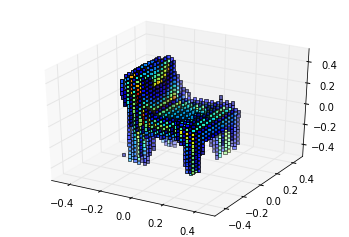

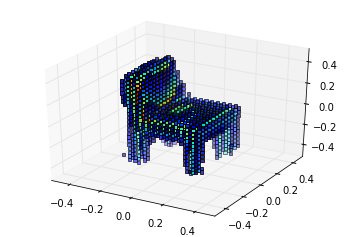

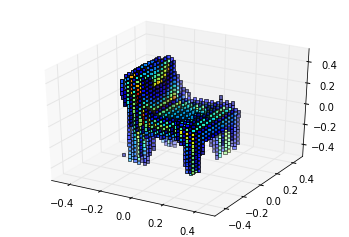

In [33]:
gt_grid_var /= np.sum(gt_grid_var)
sample_grid_var /= np.sum(sample_grid_var)
plot_probability_space_on_voxels(voxel_resolution, 0.0002, gt_grid_var, in_sphere);
plot_probability_space_on_voxels(voxel_resolution, 0.0002, sample_grid_var, in_sphere);

In [35]:
# l_gan_var = sample_grid_var
# r_gan_var = sample_grid_var
# mit_gan_var = sample_grid_var

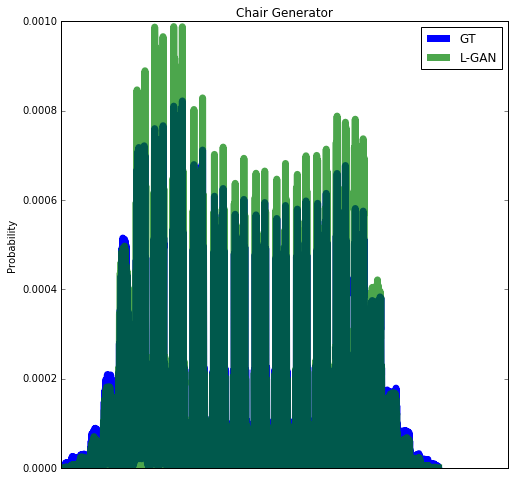

In [41]:
from matplotlib import pyplot as plt

n_vars = len(gt_grid_var)

plt.figure(figsize=(8, 8))
plt.tight_layout
plt.plot(range(n_vars), gt_grid_var, linewidth=7.0)
plt.plot(range(n_vars), l_gan_var, alpha=0.7, linewidth=7.0)

plt.ylabel("Probability")
plt.legend(['GT', 'L-GAN'])
plt.title('Chair Generator')

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

In [56]:
print np.sum(np.abs(mit_gan_var-gt_grid_var))
print np.sum(np.abs(l_gan_var-gt_grid_var))
print np.sum(np.abs(r_gan_var-gt_grid_var))

print jensen_shannon_divergence(mit_gan_var, gt_grid_var)
print jensen_shannon_divergence(l_gan_var, gt_grid_var)
print jensen_shannon_divergence(r_gan_var, gt_grid_var)

0.727078738773
0.204495760641
0.736163731696
0.116073921678
0.012063193235
0.110250497483
